## name : Hans Dong


### * set the token and the key

In [1]:
#get the token and key

import tweepy
from __future__ import print_function
import json
from pymongo import MongoClient
import numpy as np
import matplotlib as mpl   
import matplotlib.pyplot as plt

consumer_key = ''   #get the access token so that we have authority to extract data
consumer_secret = ''
access_token = ''
access_token_secret = ''
 
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)  
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
                                    # the parameter"wait on rate_limit need to be set to True when using rest api
                                    # because it needs to start automatically

print("Everything imported OK")

Everything imported OK


### * get the topic-based tweets via streaming api

In [ ]:
import tweepy
#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):
    #def on_data(self,data):
        #print(data)
        #return True
    def on_connect(self):
        # Called initially to connect to the Streaming API
        print("You are now connected to the streaming API.")
 
    def on_error(self, status_code):
        # On error - if an error occurs, display the error / status code
        print('An Error has occured: ' + repr(status_code))
        return False
    #def on_status(self, status):
    def on_error(self, status_code):
        if status_code == 420:    #error 420 means the streaming reach its limit so we need to disconnect the streaming
            #returning False in on_data disconnects the stream
            return False
    def on_data(self, data):
        #connects to mongoDB and stores the tweet
        try:
            client = MongoClient()
            
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.twitter
    
            # Decode the JSON from Twitter
            datajson = json.loads(data)
            
            #grab the 'created_at' data from the Tweet to use for display
            created_at = datajson['created_at']
         
            #print out a message to the screen that we have collected a tweet
            print("Tweet collected at " + str(created_at))
            
            #insert the data into the mongoDB into a collection called twitter_search
            #if twitter_search doesn't exist, it will be created.
            db.streaming_topic.insert(datajson)
        except Exception as e:
            print(e)

myStreamListener = MyStreamListener(api=tweepy.API(wait_on_rate_limit=True))
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
myStream.filter(track=['whisky'],languages=["en"],async=True)     #get the tweets which include whisky and in english from 12:10 to 13:10

### * get the geo-tagged tweet via streaming api

In [ ]:
# get the tweet from location in Glasgow and save it in mongodb
import tweepy

#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):
    #def on_data(self,data):
        #print(data)
        #return True
    def on_connect(self):
        # Called initially to connect to the Streaming API
        print("You are now connected to the streaming API.")
 
    def on_error(self, status_code):
        # On error - if an error occurs, display the error / status code
        print('An Error has occured: ' + repr(status_code))
        return False
    def on_data(self, data):
        try:
            client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.twitter
            # Decode the JSON from Twitter
            datajson = json.loads(data)
            created_at = datajson['created_at']
            print("Tweet collected at " + str(created_at))
            db.streaming_geo.insert(datajson)
            
        except Exception as e:
            print(e)    
myStreamListener = MyStreamListener(api=tweepy.API(wait_on_rate_limit=True))
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
myStream.filter(locations=[-4.34,55.83,-4.14,55.88],async=True,languages=["en"])
                        #location contains 4 points which represent the longtitude and latitude of the area
#locations[longtitude,latitude]

In [5]:
#close the streaming
myStream.disconnect()

### * get the tweet without any filter by streaming

In [ ]:
#get information in english via streaming 
import tweepy

#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):

    #def on_data(self,data):
        #print(data)
        #return True
    def on_connect(self):
        # Called initially to connect to the Streaming API
        print("You are now connected to the streaming API.")
 
    def on_error(self, status_code):
        # On error - if an error occurs, display the error / status code
        print('An Error has occured: ' + repr(status_code))
        return False
    def on_data(self, data):
        try:
            client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.twitter
            # Decode the JSON from Twitter
            datajson = json.loads(data)
            created_at = datajson['created_at']
            print("Tweet collected at " + str(created_at))
            db.streaming_without.insert(datajson)
        except Exception as e:
            print(e) 
            
myStreamListener = MyStreamListener(api=tweepy.API(wait_on_rate_limit=True))
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
#myStream.filter(async=True)
myStream.sample(languages=["en"])

* ## REST api for tweets in Glasgow

### * searching for geo-tagged=Glasgow, but the radius must be 1 mile and also can crawl the 75% data 

In [ ]:
#get the tweet in Glasgow geo-tagged via REST api(1 hour)
#REST api will kill the connection when 15 minutes and will reduce the number of result
#after 15 mins it need "REST" to do the next
#put this shit into database

for tweet in tweepy.Cursor(api.search,since=2018-11-16,geocode ="55.83,-4.34,10mi",languages=["en"],count=100).items():
    try:
            client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.twitter
            # Decode the JSON from Twitter
            rest=tweet._json
            created_at = rest['created_at']
            print("Tweet collected at " + str(created_at))
            db.REST_glasgow.insert(rest)
            
    except Exception as e:
            print(e)    
    #print(tweet.text )


* ## topic based tweets from REST api

In [ ]:
for tweet in tweepy.Cursor(api.search,q=["whisky"],since=2018-11-16,languages=["en"],count=100).items():
    try:
            client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.twitter
            # Decode the JSON from Twitter
            rest=tweet._json
            created_at = rest['created_at']
            print("Tweet collected at " + str(created_at))
            db.REST_topic.insert(rest)
            
    except Exception as e:
            print(e)    

### * operate the mongo db

In [26]:
client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
            # Decode the JSON from Twitter
#for result in db.streaming.find({'geo': None }):
    #print(result["text"])
    #$gt means bigger than，￥lt means less than
print(db.REST_glasgow.find({'created_at': True}).count())

Tweet collected at Wed Nov 14 21:36:47 +0000 2018
Tweet collected at Wed Nov 14 21:36:47 +0000 2018
0


D:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


Tweet collected at Wed Nov 14 21:36:50 +0000 2018
Tweet collected at Wed Nov 14 21:36:50 +0000 2018


D:\python\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


Tweet collected at Wed Nov 14 21:36:59 +0000 2018
Tweet collected at Wed Nov 14 21:36:59 +0000 2018
Tweet collected at Wed Nov 14 21:37:03 +0000 2018Tweet collected at Wed Nov 14 21:37:03 +0000 2018



In [14]:
client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
print(db.steaming_geo.find({'created_at': {"$gte":"Wed Nov 14 19:26:58 +0000 2018","$lte":"Wed Nov 14 19:27:18 +0000 2018"}}))

In [17]:
for result in db.streaming_geo.find({'created_at': {"$gte":"Wed Nov 14 19:26:58 +0000 2018","$lte":"Wed Nov 14 19:27:18 +0000 2018"}}):
    print(result["created_at"])

Wed Nov 14 19:26:58 +0000 2018
Wed Nov 14 19:26:58 +0000 2018
Wed Nov 14 19:27:09 +0000 2018
Wed Nov 14 19:27:09 +0000 2018
Wed Nov 14 19:27:10 +0000 2018
Wed Nov 14 19:27:10 +0000 2018
Wed Nov 14 19:27:18 +0000 2018
Wed Nov 14 19:27:18 +0000 2018


In [42]:
client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
print("streaming sample:",db.streaming_sample.find().count())
print("streaming topic:",db.streaming_topic.find().count())
print("streaming geo:",db.streaming_geo.find().count())
print("REST gla:",db.REST_glasgow.find().count())

streaming sample: 44180
streaming topic: 2295
streaming geo: 518
REST gla: 61291


D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.
D:\python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """
D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys


In [43]:
##put all the data into a collection named "all"
# do calculation
client = MongoClient()
db = client.twitter

print("the amount of data:",db.all.find().count())
print("the amount of geo-tagged",db.all.find({"place":{"$ne": None }}).count())
print("the Glasgow geo-tagged data",db.all.find({"place.full_name":"Glasgow, Scotland"}).count())
redundancy=db.all.aggregate([{"$group":{"_id":"$id_str"}}])
shit = 0
for redundant in redundancy:
    #print(redundant)
    shit += 1
print("redundant data",db.all.find().count()-shit)
print("retweet amount",db.all.find({"retweeted_status":{"$ne": None }}).count())
print("quote amount",db.all.find({"is_quote_status": True}).count())


D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys
D:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


the amount of data: 54685
the amount of geo-tagged 1431
the Glasgow geo-tagged data 485


D:\python\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  from ipykernel import kernelapp as app
D:\python\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  app.launch_new_instance()


redundant data 1309
retweet amount 32935
quote amount 7009


## draw the plot

In [37]:
#calculate
                                ## 
client = MongoClient()
db = client.twitter
all_geo = np.zeros(6)

                                           ##the "$gte" means bigger than,"$lte" means smaller than
print(db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count())
all_geo[0]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_geo[1]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_geo[2]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_geo[3]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_geo[4]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_geo[5]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
print(all_geo)

all_retweets = np.zeros(6)
all_retweets[0]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"},"retweeted_status":{"$ne": None }}).count()
all_retweets[1]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"},"retweeted_status":{"$ne": None }}).count()
all_retweets[2]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"},"retweeted_status":{"$ne": None }}).count()
all_retweets[3]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"},"retweeted_status":{"$ne": None }}).count()
all_retweets[4]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"},"retweeted_status":{"$ne": None }}).count()
all_retweets[5]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"},"retweeted_status":{"$ne": None }}).count()
print(all_retweets)

all_quote = np.zeros(6)
all_quote[0]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"},"is_quote_status":{"$ne": False }}).count()
all_quote[1]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"},"is_quote_status":{"$ne": False }}).count()
all_quote[2]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"},"is_quote_status":{"$ne": False }}).count()
all_quote[3]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"},"is_quote_status":{"$ne": False }}).count()
all_quote[4]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"},"is_quote_status":{"$ne": False }}).count()
all_quote[5]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"},"is_quote_status":{"$ne": False }}).count()
print(all_quote)


D:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if __name__ == '__main__':


225


D:\python\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # Remove the CWD from sys.path while we load stuff.
D:\python\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # This is added back by InteractiveShellApp.init_path()
D:\python\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if sys.path[0] == '':
D:\python\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  del sys.path[0]
D:\python\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


[39. 43. 37. 43. 36. 27.]


D:\python\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.


[4687. 4702. 4808. 4770. 4993. 5116.]


D:\python\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
D:\python\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.


[1029. 1022. 1077. 1063. 1039. 1007.]


In [21]:
all_redundant = [201.,232.,216.,224. ,225., 205.]   ##this colum was calculated by dividing database into 6 parts 
                                                    ##and then aggregating each of them
print(all_redundant)

[201.0, 232.0, 216.0, 224.0, 225.0, 205.0]


D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys
D:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # Remove the CWD from sys.path while we load stuff.
D:\python\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # This is added back by InteractiveShellApp.init_path()


47997
54685


D:\python\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if sys.path[0] == '':
D:\python\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  del sys.path[0]
D:\python\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


[7706. 7656. 7991. 8031. 8118. 8585.]
[4687. 4702. 4808. 4770. 4993. 5116.]


D:\python\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  from ipykernel import kernelapp as app


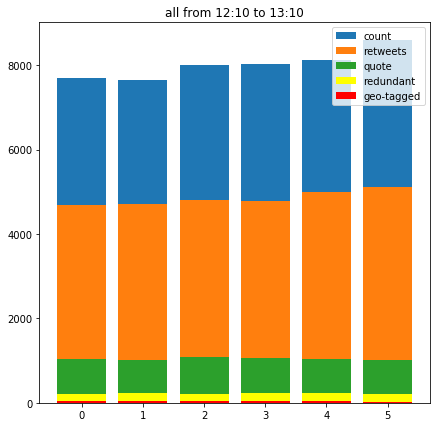

In [34]:
###statistics about the streaming sample
client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
all_count = np.zeros(6)

print(db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"}}).count())
print(db.all.find().count())
#print(result["created_at"])
all_count[0]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"}}).count()
all_count[1]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"}}).count()
all_count[2]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"}}).count()
all_count[3]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"}}).count()
all_count[4]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"}}).count()
all_count[5]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"}}).count()
print(all_count)
print(all_retweets)
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(all_count)),all_count,label='count')
ax.bar(range(len(all_retweets)),all_retweets,label='retweets')
ax.bar(range(len(all_quote)),all_quote,label='quote')
ax.bar(range(len(all_redundant)),all_redundant,label='redundant',color='yellow')
ax.bar(range(len(all_geo)),all_geo,color='red',label='geo-tagged')

ax.set_title("all from 12:10 to 13:10")
ax.legend()




D:\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.
D:\python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """
D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys
D:\python\lib\site-packages\ipykernel_launcher.py

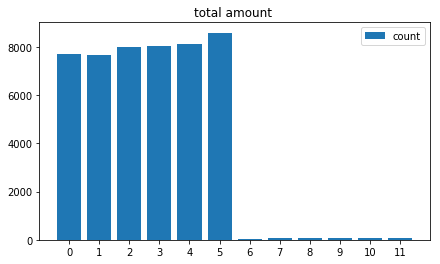

In [36]:
all_count = np.zeros(12)
all_count[0]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"}}).count()
all_count[1]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"}}).count()
all_count[2]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"}}).count()
all_count[3]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"}}).count()
all_count[4]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"}}).count()
all_count[5]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"}}).count()

all_count[6]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:40:00 +0000 2018","$lte":"Fri Nov 16 13:50:00 +0000 2018"}}).count()
all_count[7]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:50:00 +0000 2018","$lte":"Fri Nov 16 14:00:00 +0000 2018"}}).count()
all_count[8]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:00:00 +0000 2018","$lte":"Fri Nov 16 14:10:00 +0000 2018"}}).count()
all_count[9]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:10:00 +0000 2018","$lte":"Fri Nov 16 14:20:00 +0000 2018"}}).count()
all_count[10]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:20:00 +0000 2018","$lte":"Fri Nov 16 14:30:00 +0000 2018"}}).count()
all_count[11]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:30:00 +0000 2018","$lte":"Fri Nov 16 14:40:00 +0000 2018"}}).count()





fig=plt.figure(figsize=(7,4))
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(all_count)),all_count,label='count')
ax.set_title("total amount ")
ax.set_xticks(range(len(all_count)))
ax.legend()

D:\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.
D:\python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """
D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys
D:\python\lib\site-packages\ipykernel_launcher.py

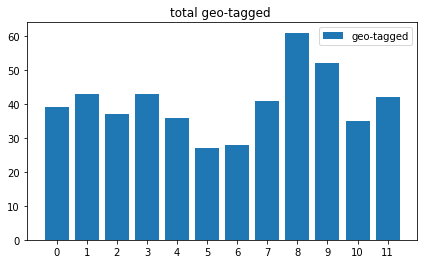

In [40]:
all_count = np.zeros(12)
all_count[0]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[1]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[2]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[3]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[4]=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[5]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()

all_count[6]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:40:00 +0000 2018","$lte":"Fri Nov 16 13:50:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[7]=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:50:00 +0000 2018","$lte":"Fri Nov 16 14:00:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[8]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:00:00 +0000 2018","$lte":"Fri Nov 16 14:10:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[9]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:10:00 +0000 2018","$lte":"Fri Nov 16 14:20:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[10]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:20:00 +0000 2018","$lte":"Fri Nov 16 14:30:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()
all_count[11]=db.all.find({'created_at': {"$gte":"Fri Nov 16 14:30:00 +0000 2018","$lte":"Fri Nov 16 14:40:00 +0000 2018"},"place.full_name":"Glasgow, Scotland"}).count()





fig=plt.figure(figsize=(7,4))
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(all_count)),all_count,label='geo-tagged')
ax.set_title("total geo-tagged ")
ax.set_xticks(range(len(all_count)))
ax.legend()

In [3]:
client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
all_count1=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:10:00 +0000 2018","$lte":"Fri Nov 16 12:20:00 +0000 2018"}})
all_count2=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:20:00 +0000 2018","$lte":"Fri Nov 16 12:30:00 +0000 2018"}})
all_count3=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:30:00 +0000 2018","$lte":"Fri Nov 16 12:40:00 +0000 2018"}})
all_count4=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:40:00 +0000 2018","$lte":"Fri Nov 16 12:50:00 +0000 2018"}})
all_count5=db.all.find({'created_at': {"$gte":"Fri Nov 16 12:50:00 +0000 2018","$lte":"Fri Nov 16 13:00:00 +0000 2018"}})
all_count6=db.all.find({'created_at': {"$gte":"Fri Nov 16 13:00:00 +0000 2018","$lte":"Fri Nov 16 13:10:00 +0000 2018"}})


In [16]:
#all_redundant = np.zeros(6)

redundancy=db.red6.aggregate([{"$group":{"_id":"$id_str"}}])
shit = 0
for redundant in redundancy:
    #print(redundant)
    shit += 1
all_redundant[5]=db.red6.find().count()-shit
print(all_redundant)

[201. 232. 216. 224. 225. 205.]


D:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


[201.0, 232.0, 216.0, 224.0, 225.0, 205.0]


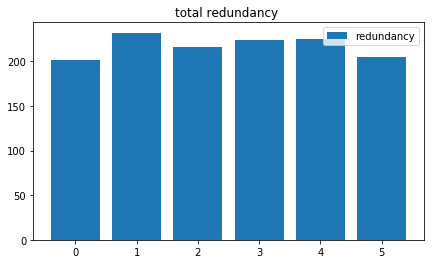

In [41]:
all_redundant = [201.,232.,216.,224. ,225., 205.]
print(all_redundant)
fig=plt.figure(figsize=(7,4))
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(all_redundant)),all_redundant,label='redundancy')
ax.set_title("total redundancy ")
ax.set_xticks(range(len(all_redundant)))
ax.legend()

In [8]:
for i in all_count5:
    client = MongoClient()
    db = client.twitter
    db.red5.insert(i)

D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  after removing the cwd from sys.path.


In [9]:
for i in all_count6:
    client = MongoClient()
    db = client.twitter
    db.red6.insert(i)

D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  after removing the cwd from sys.path.


In [16]:
client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
print("streaming sample:",db.streaming_sample.find().count())
print("streaming topic:",db.streaming_topic.find().count())
print("streaming geo:",db.streaming_geo.find().count())
print("REST gla:",db.REST_glasgow.find().count())

streaming sample: 44180
streaming topic: 2295
streaming geo: 518
REST gla: 61291


D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.
D:\python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """
D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
D:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys


In [47]:
#cut the useless data
client = MongoClient()
db = client.twitter
db.slide.remove({'created_at': {"$lte":"Fri Nov 16 13:09:13 +0000 2018"}})
#db.slide.remove({'created_at': {"$gte":"Fri Nov 16 13:55:00 +0000 2018"}})
##db.streaming_geo.remove({'created_at': {"$lte":"Fri Nov 16 13:40:00 +0000 2018"}})
###db.streaming_geoafter.remove({'created_at': {"$gte":"Fri Nov 16 14:40:00 +0000 2018"}})
###db.REST_glasowafter.remove({'created_at': {"$lte":"Fri Nov 16 12:10:00 +0000 2018"}})
###db.REST_glasowafter.remove({'created_at': {"$gte":"Fri Nov 16 13:10:00 +0000 2018"}})
###db.REST_topicafter.remove({'created_at': {"$lte":"Fri Nov 16 12:10:00 +0000 2018"}})
###db.REST_topicafter.remove({'created_at': {"$gte":"Fri Nov 16 13:10:00 +0000 2018"}})

D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  after removing the cwd from sys.path.


{'n': 52771, 'ok': 1.0}

In [21]:
client = MongoClient()
db = client.twitter

print("the amount of data:",db.all.find().count())
print("the amount of geo-tagged",db.all.find({"place":{"$ne": None }}).count())
print("the Glasgow geo-tagged data",db.all.find({"place.full_name":"Glasgow, Scotland"}).count())
redundancy=db.all.aggregate([{"$group":{"_id":"$id_str"}}])
shit = 0
for redundant in redundancy:
    #print(redundant)
    shit += 1
print("redundant data",db.all.find().count()-shit)
print("retweet amount",db.all.find({"retweeted_status":{"$ne": None }}).count())
print("quote amount",db.all.find({"is_quote_status": True}).count())


D:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.


the amount of data: 54685


D:\python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """


the amount of geo-tagged 1431


D:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


the Glasgow geo-tagged data 485


D:\python\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if sys.path[0] == '':


redundant data 1309


D:\python\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  del sys.path[0]


retweet amount 32935


D:\python\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


quote amount 7009


In [56]:
#take out the redundant data


client = MongoClient()
            # Use twitterdb database. If it doesn't exist, it will be created.
db = client.twitter
redundancy=db.all.aggregate([{"$group":{"_id":"$id_str"}}])
for redundant in redundancy:
    i=redundant["_id"]
    wtf = db.all.find({"id_str":i,"retweeted_status":None,"is_quote_status":False})
    j=0
    for data in wtf:
        if j>0:
            break
        else:
            db.after.insert_one(data)
        j=j+1

In [5]:
import spacy
from spacy import displacy
from collections import Counter

import en_core_web_sm



In [3]:
print("the Glasgow geo-tagged data",db.REST_glasowafter.find({"place.full_name":"Glasgow, Scotland"}).count())


D:\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


the Glasgow geo-tagged data 221


In [3]:
###ner-filter take out the meaningless data like good morening or 
import spacy
from spacy import displacy
from collections import Counter

import en_core_web_sm



client = MongoClient()
db = client.twitter
                                                            
mycol = db.after
sets = mycol.find()

nlp = en_core_web_sm.load()             #load the word database
                            
for set in sets:
    doc = nlp(set['text'])

    i1 = 0
    i2 = 0
    i3 = 0
                        #set the organization, person and location elements
    orgstr = ""
    locstr = ""
    pstr = ""


    for X in doc.ents:
        str = X.label_
        if ord(X.text[0])>64 and ord(X.text[0])<123:
            if (str is "ORG"):
                if(i1==0):
                    orgstr = X.text.lower()
                    i1==1

            elif (str is "LOC"):
                if(i2==0):
                    locstr =  X.text.lower()
                    i2=1

            elif (str is "PERSON"):
                if(i3==0):
                    pstr = X.text.lower()
                    i3=1





    if (orgstr is not "") or (locstr is not "") or (pstr is not ""):
        id=set['id']

        db.new2.insert_one({"id":id,"ORG": orgstr,"LOC": locstr,"PERSON": pstr,"TagNum": 0,"ORGTAG":0,"PTAG":0,"LOCTAG":0,"Amount":0})


In [53]:
#implement the algorithm

import operator


DISTANCE = 10000

client = MongoClient()
db = client.twitter


orglist = []
personlist = []
loclist = []


DATASET= db.new2.aggregate([{"$group":{"_id":"$PERSON"}}])
for data in DATASET:
    if not operator.eq(data['_id'],""):
        personlist.append(data['_id'])              
print(len(personlist))

DATASET= db.new2.aggregate([{"$group":{"_id":"$ORG"}}])
for data in DATASET:
    if not operator.eq(data['_id'], ""):
        orglist.append(data['_id'])
print(len(orglist))

DATASET= db.new2.aggregate([{"$group":{"_id":"$LOC"}}])
for data in DATASET:
    if not operator.eq(data['_id'], ""):
        loclist.append(data['_id'])
print(len(loclist))


G = 0
GG = DISTANCE
GGG = DISTANCE * 2
GGGG = DISTANCE * 3

orgONE = []
personONE = []
locONE = []

myquery = {"TagNum": {'$ne':0}}
newvalues = {"$set": {"TagNum": 0,"ORGTAG":0,"PTAG":0,"LOCTAG":0}}
mycol.update_many(myquery, newvalues)



for i in range(len(orglist)):
    ones = db.new2.find()
    for one in ones:
        if (operator.eq(one['ORG'],orglist[i])):
            orgONE.append(orglist[i])
            #orgID.append(one['_id'])
            myquery = {"_id": one['_id']}                            
            t=one['TagNum']+1
            newvalues = {"$set": {"NG": G,"ORGTAG":1,"TagNum":t}}
            db.new2.update_many(myquery, newvalues)
    G = G + 1
print("org",G)

for i in range(len(personlist)):
    # print("list ",list[i])
    ones = db.new2.find()
    for one in ones:
        if (operator.eq(one['PERSON'],personlist[i])):
            personONE.append(personlist[i])
            #personID.append(one['_id'])
            myquery = {"_id": one['_id']}
            t = one['TagNum'] + 1
            newvalues = {"$set": {"NG": GG,"PTAG":1,"TagNum":t}}
            db.new2.update_many(myquery, newvalues)
    GG = GG + 1
print("person",GG)

for i in range(len(loclist)):
    ones = db.new2.find()
    for one in ones:
        if (operator.eq(one['LOC'],loclist[i])):
            locONE.append(loclist[i])
            #locID.append(one['_id'])
            myquery = {"_id": one['_id']}
            t = one['TagNum'] + 1
            newvalues = {"$set": {"NG": GGG,"LOCTAG":1,"TagNum":t}}
            db.new2.update_many(myquery, newvalues)
    GGG = GGG + 1
print("loc",GGG)

DATASET= db.new2.aggregate([{"$group":{"_id":"$NG"}}])

i=0
for data in DATASET:
    i+=1

ones = db.new2.find()
for one in ones:
    if (one['TagNum']==3):
        myquery =  {'$or':[{"LOC": one['LOC']},{"PERSON": one['PERSON']},{"ORG": one['ORG']}]}
        newvalues = {"$set": {"NG": GGGG,"TagNum":4}}
        db.new2.update_many(myquery, newvalues)
        GGGG += 1


    elif(one['TagNum']==2):

        if one['ORGTAG']==1 and one['LOCTAG']==1:
            myquery = {'$or': [{"LOC": one['LOC']},{"ORG": one['ORG']}]}
            newvalues = {"$set": {"NG": GGGG, "TagNum": 5}}
        elif one['ORGTAG']==1 and one['PTAG']==1:
            myquery = {'$or': [{"PERSON": one['PERSON']},{"ORG": one['ORG']}]}
            newvalues = {"$set": {"NG": GGGG, "TagNum": 5}}
        elif one['PTAG']==1 and one['LOCTAG']==1:
            myquery = {'$or': [{"LOC": one['LOC']},{"PERSON": one['PERSON']}]}
            newvalues = {"$set": {"NG": GGGG, "TagNum": 5}}

        db.new2.update_many(myquery, newvalues)
        GGGG += 1

DATASET= db.new2.aggregate([{"$group":{"_id":"$NG"}}])

i=0
for data in DATASET:
    i+=1
print(i)



2407
2747
115
org 2747
person 12407
loc 20115
4647


In [54]:
import operator

client = MongoClient()
db = client.twitter

#mygroup = mydb[NEWDATABASE]

DATASET= db.new2.aggregate([{"$group":{"_id":"$NG"}}])

i=0
for data in DATASET:
    ggs = db.new2.find({'NG': data['_id']})
    count = 0
    for gg in ggs:
        count+=1

    myquery = {"NG":data['_id'] }
    newvalues = {"$set": {"Amount": count}}
    db.new2.update_many(myquery, newvalues)

    i+=1

print(i)

4647


In [55]:

import operator

client = MongoClient()
db = client.twitter

mycol = db.new2


myquery = {"Amount": {'$ne':1}}

DATASET= mycol.find(myquery)

for data in DATASET:                #take the tweet with the same elements into the same group
    db.newgroup.insert_one(data)

D:\python\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  from ipykernel import kernelapp as app
D:\python\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


the number of group is 0


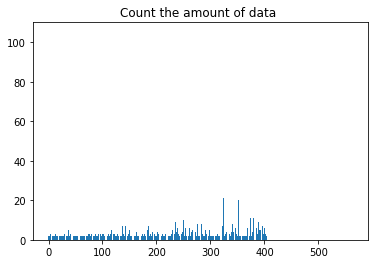

In [57]:
import operator

DATABASENAME = "local"
rect = np.zeros(564)
NEWDATABASE = "GroupData"

client = MongoClient()
db = client.twitter


DATASET= db.newgroup.aggregate([{"$group":{"_id":"$NG"}}])
i=0
for tweet in DATASET:
    id = tweet['_id']
    rect[i] = db.newgroup.find({"NG":id}).count()
    i += 1

fig=plt.figure()
plt.ylim(0,110)
ax=fig.add_subplot(1,1,1)
ax.bar(range(len(rect)),rect)
ax.set_title("Count the amount of data ")
i=0
for data in DATASET:
    i+=1
print("the number of group is",i)


In [48]:
## cut the data for 5 mins


import numpy as np
import pymongo
import matplotlib as mpl
import matplotlib.pyplot as plt

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["twitter"] #database name

mycol = mydb["all"]
mynew = mydb["5min"]

# insert five mins for all data
mins = mycol.find({'created_at': {"$gte":"Fri Nov 16 12:10:56 +0000 2018","$lte":"Fri Nov 16 12:15:56 +0000 2018"}})

for min in mins:
    mynew.insert_one(min)

#insert five mins for geodata(geodata is in next hour)
mins = mycol.find({'created_at': {"$gte":"Fri Nov 16 13:30:56 +0000 2018","$lte":"Fri Nov 16 13:35:56 +0000 2018"}})

for min in mins:
    mynew.insert_one(min)